## Modelo de Asociación a Priori
Algoritmo clásico utilizado en minería de datos para identificar relaciones entre variables dentro de grandes conjuntos de datos. Es especialmente útil en la detección de reglas de asociación, que son patrones del tipo "si sucede A, es probable que suceda B". Ampliamente aplicado en el caso de los sistemas de recomendación o cestas de compra.

El algoritmo a priori trabaja en dos fases principales:

**1. Generación de elementos frecuentes:** Identificar conjuntos de elementos que ocurren juntos con mayor frecuencia, basándose en un umbral de soporte mínimo. El soporte mide la frecuencia con la que un conjunto de elementos aparece en el conjunto de datos.

**2. Generación de reglas de asociación:** A partir de los conjuntos frecuentes, se generan reglas del tipo "si A, entonces B". Se evalúa la confianza (la probabilidad de que B ocurra dado que A ha ocurrido) y el lift (cuánto mejora la confianza en la predicción de B al saber que A ocurre).


**Groceries Market Basket Dataset**
Este dataset contiene transacciones de compras en un supermercado, donde cada transacción incluye los productos adquiridos por un cliente en una sola compra.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df = pd.read_csv('groceries2.csv')

# Mostrar las primeras filas del dataset
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Para aplicar el algoritmo apriori, es necesario convertir estas columnas en una **matriz de transacciones** (también llamada formato one-hot encoding), donde cada fila representa una transacción y cada columna un producto individual, con valores 1 si el producto fue comprado en esa transacción o 0 en caso contrario.

In [ ]:
# Unir todas las columnas de productos en una sola lista de productos por transacción
# Ignoramos la primera columna que parece ser el número de productos
df_transformed = df.drop(columns=['Item(s)']).apply(lambda row: row.dropna().tolist(), axis=1)

# Crear una lista de todos los productos únicos
all_items = sorted(set([item for sublist in df_transformed for item in sublist]))

# Crear la matriz binaria (transacciones)
transactions = pd.DataFrame(0, index=range(len(df_transformed)), columns=all_items)

for idx, items in enumerate(df_transformed):
    transactions.loc[idx, items] = 1

# Convertir la matriz de transacciones a tipo booleano
transactions = transactions.astype(bool)
# Mostrar la matriz de transacciones
transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Aplicación de a priori:** Se calcula el soporte de los ítems frecuentes utilizando apriori() con un soporte mínimo de 0.02 (2%), lo que significa que solo se considerarán los conjuntos de ítems que aparecen en al menos el 2% de las transacciones.

**Conjuntos frecuentes de ítems junto con su respectivo soporte.**
*   Support: Es la frecuencia relativa con la que aparece un ítem o conjunto de ítems en el total de transacciones. Por ejemplo: (UHT-milk) tiene un soporte de 0.033452, lo que significa que el 3.34% de las transacciones incluyen leche UHT.
*   itemsets: Estos son los conjuntos de productos que han sido identificados como frecuentes en las transacciones. Por ejemplo:
(whipped/sour cream, whole milk) aparece con un soporte del 0.032232 (3.22%), lo que indica que ambas cremas y leche entera se compran juntas en ese porcentaje de transacciones.



In [ ]:
# Aplicar el algoritmo a priori con un soporte mínimo del 2%
frequent_itemsets = apriori(transactions, min_support=0.02, use_colnames=True)

# Mostrar los conjuntos de ítems frecuentes
print("Conjuntos frecuentes de ítems:")
frequent_itemsets

Conjuntos frecuentes de ítems:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whipped/sour cream, whole milk)"
118,0.020742,"(whipped/sour cream, yogurt)"
119,0.056024,"(whole milk, yogurt)"
120,0.023183,"(other vegetables, whole milk, root vegetables)"


**Reglas de asociación generadas a partir del algoritmo a priori.** Cada fila representa una regla, con información relevante sobre los productos asociados y sus métricas.

*   antecedents: Los productos que, cuando se compran juntos, predicen la compra de los productos en la columna consequents.
*   consequents: Los productos que tienden a ser comprados después de los productos en antecedents.

*   support: La frecuencia con la que ambos conjuntos (antecedentes y consecuentes) aparecen juntos en las transacciones, expresada como un porcentaje.
*   confidence: La probabilidad de que el conjunto de consequents sea comprado dado que el conjunto de antecedents fue comprado. Por ejemplo, si la confianza es de 0.405, significa que el 40.5% de las veces que se compra carne de res (beef), también se compra leche entera (whole milk).

*   lift: Cuán más probable es que se compren los consequents cuando se compran los antecedents, en comparación con la compra de los consequents solos. Un valor mayor que 1 indica una asociación fuerte.






In [ ]:
# Generar las reglas de asociación con un umbral de 'lift' mínimo de 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Mostrar las reglas de asociación generadas
print("Reglas de asociación:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Reglas de asociación:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(beef),(whole milk),0.021251,0.405039,1.585180
1,(whole milk),(beef),0.021251,0.083168,1.585180
2,(other vegetables),(bottled water),0.024809,0.128219,1.160101
3,(bottled water),(other vegetables),0.024809,0.224471,1.160101
4,(rolls/buns),(bottled water),0.024199,0.131564,1.190373
...,...,...,...,...,...
121,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235
122,"(whole milk, yogurt)",(other vegetables),0.022267,0.397459,2.054131
123,(other vegetables),"(whole milk, yogurt)",0.022267,0.115081,2.054131
124,(whole milk),"(other vegetables, yogurt)",0.022267,0.087147,2.007235


**Reglas de asociación que tienen una confianza mayor al 50%.**
En este caso solo hay una regla, con la sigueinte explicacion:
*   antecedents: (other vegetables, yogurt)
Esto significa que cuando se compran otros vegetales junto con yogur, se está considerando la relación con la leche entera.
*   consequents: (whole milk)
Este es el producto que se predice que se comprará si se adquieren los otros vegetales y yogur.
*   support: 0.022267
Indica que aproximadamente el 2.23% de todas las transacciones incluyen tanto otros vegetales como yogur y también leche entera.
*   confidence: 0.512881
Esto sugiere que hay un 51.29% de probabilidad de que se compre leche entera si se compran otros vegetales y yogur juntos.
*   lift: 2.007235
. Significa que es aproximadamente dos veces más probable comprar leche entera junto con otros vegetales y yogur en comparación con comprar leche entera de manera aislada. Esto indica una asociación fuerte.

In [ ]:
# Filtrar las reglas más interesantes con confianza mayor al 50%
rules_filtered = rules[rules['confidence'] > 0.5]

# Mostrar las reglas filtradas
print("Reglas con confianza mayor al 50%:")
rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Reglas con confianza mayor al 50%:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
121,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235


Gráfico para visualizar los conjuntos de ítems frecuentes, un gráfico de barras para mostrar el soporte de los conjuntos frecuentes, que te permite ver rápidamente qué ítems son más comunes.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


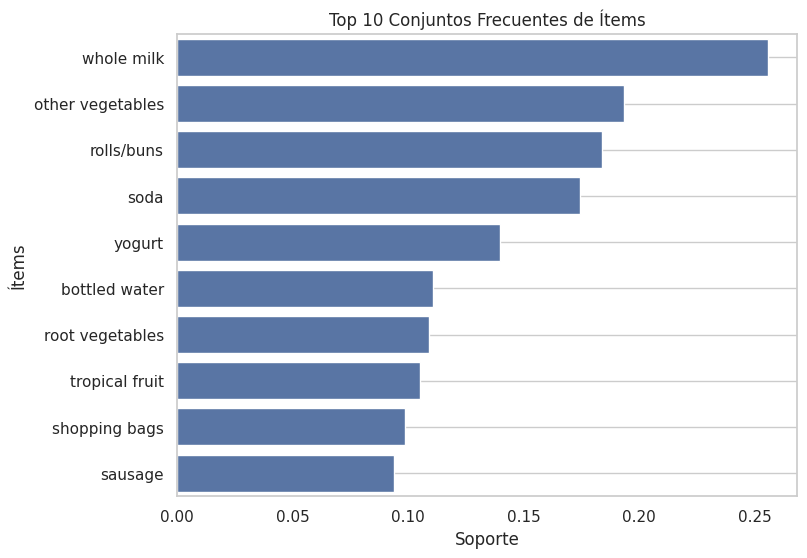

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los top 10 conjuntos frecuentes de ítems
top_frequent_items = frequent_itemsets.nlargest(10, 'support')

# Extraer los nombres de los ítems
top_frequent_items['itemsets'] = top_frequent_items['itemsets'].apply(lambda x: ', '.join(list(x)))

# Graficar los conjuntos frecuentes de ítems
plt.figure(figsize=(8, 6))
sns.barplot(data=top_frequent_items, x='support', y='itemsets')

# Etiquetas y título
plt.title('Top 10 Conjuntos Frecuentes de Ítems')
plt.ylabel('Ítems')
plt.xlabel('Soporte')
plt.grid()

plt.show()

El modelo de asociación a priori se utiliza principalmente para descubrir relaciones entre ítems en transacciones en lugar de hacer predicciones en el sentido tradicional, como en la regresión o los modelos de clasificación.

**Se puede utilizar las reglas de asociación generadas para hacer recomendaciones basadas en las compras de los clientes.**

**Sistema de recomendación que sugiere ítems a los clientes basándose en lo que han comprado anteriormente**

In [ ]:
def recomendar(producto, reglas, top_n=3):
    # Filtrar reglas donde el antecedente es el producto
    reglas_producto = reglas[rules['antecedents'].apply(lambda x: producto in x)]

    # Ordenar las reglas por confianza y seleccionar las top_n
    recomendaciones = reglas_producto.sort_values(by='confidence', ascending=False).head(top_n)

    # Retornar los ítems recomendados
    return recomendaciones['consequents']

# Ejemplo de uso
producto_comprado = 'yogurt'
recomendaciones = recomendar(producto_comprado, rules)
print(f'Recomendaciones para el producto "{producto_comprado}":')
recomendaciones


Recomendaciones para el producto "yogurt":


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,consequents
121,(whole milk)
113,(whole milk)
122,(other vegetables)


Esto significa que, según las reglas de asociación que generaste, cuando un cliente compra "yogurt", es probable que también compre "whole milk" y "other vegetables".